<a href="https://colab.research.google.com/github/risha0822/machinelearning_lab_cs3/blob/master/RISHA__Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[0.45109895 0.1999973 ]
 [0.19242517 0.05065823]
 [0.41640382 0.09866732]
 [0.6119831  0.17599276]
 [0.69084812 0.29600195]
 [0.6119831  0.27999892]
 [0.68453991 0.35733787]
 [0.74448032 0.44266483]
 [0.73501801 0.33867218]
 [0.90536447 0.4826724 ]
 [0.81071647 0.36800205]
 [0.83911585 0.4640067 ]
 [0.85488637 0.61599492]
 [0.70661863 0.51200227]
 [0.55520926 0.3813289 ]
 [0.44479074 0.25066905]
 [0.25867378 0.11999567]
 [0.19242517 0.01332685]
 [0.         0.        ]
 [0.15142184 0.07732544]
 [0.29653547 0.02932987]
 [0.40694152 0.05333441]
 [0.49211474 0.09600465]
 [0.30284368 0.21866299]
 [0.52996397 0.32266915]
 [0.6687694  0.3920066 ]
 [0.6687694  0.43466331]
 [0.78548365 0.05065823]
 [0.84226996 0.16800476]
 [0.65299889 0.08266429]
 [0.44794485 0.03199254]
 [0.49526885 0.19467196]
 [0.57728797 0.25867056]
 [0.63721591 0.37332739]
 [0.77917545 0.48533506]
 [0.84857816 0.55999784]
 [0.92428908 0.61333225]
 [0.9495219  0.53333063]
 [0.97790882 0.5733382 ]
 [0.86750277 0.35733787]


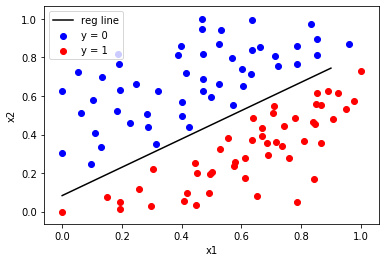

In [9]:
import csv 
import numpy as np 
import matplotlib.pyplot as plt 
  
  
def loadCSV(filename): 
    ''' 
    function to load dataset 
    '''
    with open(filename,"r") as csvfile: 
        lines = csv.reader(csvfile) 
        dataset = list(lines) 
        for i in range(len(dataset)): 
            dataset[i] = [float(x) for x in dataset[i]]      
    return np.array(dataset) 
  
  
def normalize(X): 
    ''' 
    function to normalize feature matrix, X 
    '''
    mins = np.min(X, axis = 0) 
    maxs = np.max(X, axis = 0) 
    rng = maxs - mins 
    norm_X = 1 - ((maxs - X)/rng) 
    return norm_X 
  
  
def logistic_func(beta, X): 
    ''' 
    logistic(sigmoid) function 
    '''
    # below is the code for 1/1+e^(-(bo*x1+ b1*x2 +  b1*x3............ ))
    #return  horizontal array
    return 1.0/(1 + np.exp(-np.dot(X, beta.T))) 
  
  
def log_gradient(beta, X, y): 
    ''' 
    logistic gradient function 
    '''
    #first_calc = y_prediction - y_actual  for all samples # make y_actual as
    first_calc = logistic_func(beta, X) - y.reshape(X.shape[0], -1) 
    # now in below step we will find the partial derivative
    #final_calc= gradient is (y_prediction - y_actual)*x  for all samples 
    final_calc = np.dot(first_calc.T, X) 
    
    return final_calc 
  
  
def cost_func(beta, X, y): 
    ''' 
    cost function, J 
    '''
    #y_prediction=  1/1+e^(-(bo*x1+ b1*x2 +  b1*x3............ )) for all samples
    y_prediction= logistic_func(beta, X) 
    y = np.squeeze(y) 
    # calculate cross entropy cost function for all samples
    cost_function = -(y * np.log(y_prediction)) - ((1 - y) * np.log(1 - y_prediction) ) 
    # return the sum of  cost function divided by no. of samples
    return np.mean(cost_function) 
  
  
def train(X, y, beta, lr=.01, converge_change=.001): 
    ''' 
    gradient descent function 
    '''
    cost = cost_func(beta, X, y)
    print("initial cost is:")
    print(cost) 
    change_cost = 1
    num_iter = 1
      
    while(change_cost > converge_change): 
        old_cost = cost 
        #beta= beta - learning_rate * partial derivative of cost function w.r.t beta
        beta = beta - (lr * log_gradient(beta, X, y)) 
        # again calculate cost function
        cost = cost_func(beta, X, y) 
        # find difference between old cost and new cost 
        #if change is greater than .001 then reiterate 
        change_cost = old_cost - cost 
        num_iter += 1
      
    return beta, num_iter  
  
  
def pred_values(beta, X): 
    ''' 
    function to predict labels 
    '''
    pred_prob = logistic_func(beta, X) 
    pred_value = np.where(pred_prob >= .5, 1, 0) 
    return np.squeeze(pred_value) 
  
  
def plot_reg(X, y, beta): 
    ''' 
    function to plot decision boundary 
    '''
    # labelled observations 
    x_0 = X[np.where(y == 0.0)] 
    x_1 = X[np.where(y == 1.0)] 
      
    # plotting points with diff color for diff label 
    plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='b', label='y = 0') 
    plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1') 
      
    # plotting decision boundary 
    x1 = np.arange(0, 1, 0.1) 
    x2 = -(beta[0,0] + beta[0,1]*x1)/beta[0,2] 
    plt.plot(x1, x2, c='k', label='reg line') 
  
    plt.xlabel('x1') 
    plt.ylabel('x2') 
    plt.legend() 
    plt.show() 
      
  
      
if __name__ == "__main__": 
    # load the dataset 
    dataset = loadCSV('dataset1.csv') 
      
    # normalizing feature matrix 
    X = normalize(dataset[:, :-1]) 
    print(X)
      
    # stacking columns wth all ones in feature matrix 
    X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X))
    print(X)
  
    # response vector 
    y = dataset[:, -1] 
    print(y)
  
    # initial beta values 
    beta = np.matrix(np.zeros(X.shape[1]))
    print(beta) 
  
    # beta values after running gradient descent 
    beta, num_iter =train(X, y, beta) 
  
    # estimated beta values and number of iterations 
    print("Estimated regression coefficients:", beta) 
    print("No. of iterations:", num_iter) 
    # predicted labels 
    y_pred = pred_values(beta, X) 
      
    # number of correctly predicted labels 
    print("Correctly predicted labels:", np.sum(y == y_pred)) 
      
    # plotting regression line 
    plot_reg(X, y, beta) 

# New Section